In [66]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('./mobile_phone_price_prediction.csv')
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [68]:
df.Name = df['Name'].str.replace(r'\(.*\)', '', regex=True).str.strip()
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s,4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [69]:
def apply_network_type(features):
    if 'Vo5G' in features:
        return 'Vo5G'
    elif '5G' in features:
        return '5G'
    elif '4G' in features:
        return '4G'
    else:
        return 'Other'

In [70]:
df['No_of_sim'] = df['No_of_sim'].apply(apply_network_type)
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,5G,4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,4G,2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,4G,4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,4G,4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s,4.10,69,4G,4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [71]:
df[df['No_of_sim'] == 'Other']

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
538,538,Poco Pad Tablet,4.4,67,Other,6 GB RAM,10500 mAh Battery,12.1 inches,8 MP Rear &amp; 8 MP Front Camera,Memory Card Supported,14,"29,990",Poco,128 GB inbuilt,33W Fast Charging,1600 x 2560 px,Octa Core,Snapdragon 7s Gen2
1142,1142,Xiaomi Qin 2 Pro,4.0,46,Other,2 GB RAM,2100 mAh Battery,5 inches,13 MP Rear Camera,No FM Radio,NaN,"9,990",Xiaomi,64 GB inbuilt,NaN,576 x 1440 px Display,Quad Core,Unisoc SC9832E


In [72]:
df.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [74]:
# Function to extract numbers
import re

def extract_number(ram_string):
    match = re.search(r'\d+(\.\d+)?', ram_string)
    return float(match.group()) if match else None

In [75]:
df1 = df.copy()


In [76]:
df1['Ram'] = df1['Ram'].apply(extract_number)


In [77]:
df1['Battery'] = df1['Battery'].apply(extract_number)

In [78]:
df1['Display'] = df1['Display'].apply(extract_number)

In [79]:
# Function to extract numbers
def extract_memory(memory_string):
    if isinstance(memory_string, str):  # Check if the entry is a string
        match = re.search(r'\d+', memory_string)
        return int(match.group()) if match else None
    else:
        return None  # Return None for non-string entries

# Applying the function to the 'Inbuilt_memory' column


In [80]:
df1['Inbuilt_memory'] = df1['Inbuilt_memory'].apply(extract_memory)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   float64
 6   Battery            1370 non-null   float64
 7   Display            1370 non-null   float64
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1350 non-null   float64
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [82]:
df1.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,5G,4.0,6000.0,6.6,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128.0,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,4G,2.0,4000.0,6.4,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32.0,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,4G,4.0,5000.0,6.6,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64.0,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,4G,4.0,6000.0,6.4,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64.0,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s,4.10,69,4G,4.0,5000.0,6.5,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64.0,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [83]:
df1.describe()

,Unnamed: 0,Rating,Spec_score,Ram,Battery,Display,Inbuilt_memory
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1350.000000
mean,684.500000,4.374416,80.234307,15.312774,4920.945803,9.827810,170.334074
std,395.629246,0.230176,8.373922,164.857364,576.390420,115.998793,102.820125
min,0.000000,3.750000,42.000000,1.000000,6.000000,4.500000,1.000000
25%,342.250000,4.150000,75.000000,6.000000,4800.000000,6.550000,128.000000
50%,684.500000,4.400000,82.000000,8.000000,5000.000000,6.670000,128.000000
75%,1026.750000,4.550000,86.000000,8.000000,5000.000000,6.740000,256.000000
max,1369.000000,4.750000,98.000000,6000.000000,10500.000000,4300.000000,512.000000


In [84]:
df1.Processor.unique()

array([' Octa Core Processor', ' 1.8 GHz Processor', ' 2 GHz Processor',
       ' Octa Core', nan, ' Quad Core', ' Nine-Cores', ' Nine Core',
       ' Nine Cores', ' Deca Core Processor', ' 1.3 GHz Processor',
       ' 1.6 GHz Processor', ' 2.3 GHz Processor', ' Deca Core',
       ' 128 GB inbuilt'], dtype=object)

In [85]:
def extract_processor(description):
    if isinstance(description, str):
        description = description.lower()
        # Predefined mappings
        ghz_mappings = {
            '1.8 ghz': 8,
            '1.3 ghz': 8,
            '1.6 ghz': 8,
            '2.3 ghz': 4
        }
        if 'octa core' in description:
            return 8
        elif 'quad core' in description:
            return 4
        elif 'deca core' in description:
            return 10
        elif 'nine' in description:
            return 9
        elif any(key in description for key in ghz_mappings):
            for key in ghz_mappings:
                if key in description:
                    return ghz_mappings[key]
        elif 'inbuilt' in description:
            match = re.search(r'\d+', description)
            return int(match.group()) if match else None
        else:
            return None
    else:
        return None  # Return None for non-string or NaN values

In [86]:
df2 = df1.copy()

In [87]:
df2['Processor'] = df2['Processor'].apply(extract_processor)
df2.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,5G,4.0,6000.0,6.6,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128.0,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,8.0,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,4G,2.0,4000.0,6.4,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32.0,15W Fast Charging,720 x 1560 px Display with Punch Hole,8.0,Octa Core
2,2,Samsung Galaxy A13,4.30,75,4G,4.0,5000.0,6.6,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64.0,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,NaN,Octa Core
3,3,Samsung Galaxy F23,4.10,73,4G,4.0,6000.0,6.4,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64.0,NaN,720 x 1600 px,8.0,Helio G88
4,4,Samsung Galaxy A03s,4.10,69,4G,4.0,5000.0,6.5,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64.0,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,8.0,Helio P35


In [88]:
(df1.Processor_name.unique())

array(['Exynos 1330', 'Octa Core', 'Helio G88', 'Helio P35',
       'Dimensity 700', 'Exynos 9611', 'Exynos  850', 'Exynos 1280',
       'Snapdragon 695', 'Exynos 850', 'Helio P65', 'Octa Core Processor',
       'Snapdragon 680', 'Helio G80', 'Samsung Exynos 7884',
       'Dimensity 6100 Plus', 'Dimensity 700 5G', 'Snapdragon  680',
       'Snapdragon 888', 'Exynos 1380', 'Snapdragon 865', 'Exynos 980',
       'Snapdragon 730', 'Snapdragon 675', 'Snapdragon 7 Gen1',
       'Snapdragon 750G', 'Snapdragon 855+', 'Snapdragon 870',
       'Snapdragon 710', 'Exynos 1480', 'Snapdragon  720G ',
       'Snapdragon 778g', 'Exynos 2200', 'Snapdragon 7+ Gen2',
       'Snapdragon 8 Gen 2', 'Exynos 9825', 'Snapdragon 7s Gen2',
       'Exynos 2100', 'Dimensity 1300', 'Snapdragon 778G+',
       'Snapdragon 778G', 'Exynos 2300', 'Snapdragon 8+ Gen1',
       'Snapdragon 8 Gen3', 'Snapdragon  8+ Gen1', 'Snapdragon  8 Gen1',
       'Exynos 990', 'Snapdragon 855', 'Exynos 8895', 'Exynos  2100',
       'Ex

In [89]:
df2.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')

In [90]:
df3 = df2.drop(['Unnamed: 0','Name','Camera','External_Memory','Android_version','Screen_resolution','Processor_name'],axis='columns')
df3.head()

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,5G,4.0,6000.0,6.6,"9,999",Samsung,128.0,25W Fast Charging,8.0
1,4.20,63,4G,2.0,4000.0,6.4,"9,990",Samsung,32.0,15W Fast Charging,8.0
2,4.30,75,4G,4.0,5000.0,6.6,"11,999",Samsung,64.0,25W Fast Charging,NaN
3,4.10,73,4G,4.0,6000.0,6.4,"11,999",Samsung,64.0,NaN,8.0
4,4.10,69,4G,4.0,5000.0,6.5,"11,999",Samsung,64.0,15W Fast Charging,8.0


In [91]:
def extract_first_number_in_charging(text):
    if pd.isna(text):  # Check if the value is NaN
        return None
    match = re.search(r'\d+', text)
    if match:
        return int(match.group())
    else:
        return None

In [92]:
df4 = df3.copy()
df4['fast_charging'] = df4['fast_charging'].apply(extract_first_number_in_charging)
df4.head()

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,5G,4.0,6000.0,6.6,"9,999",Samsung,128.0,25.0,8.0
1,4.20,63,4G,2.0,4000.0,6.4,"9,990",Samsung,32.0,15.0,8.0
2,4.30,75,4G,4.0,5000.0,6.6,"11,999",Samsung,64.0,25.0,NaN
3,4.10,73,4G,4.0,6000.0,6.4,"11,999",Samsung,64.0,NaN,8.0
4,4.10,69,4G,4.0,5000.0,6.5,"11,999",Samsung,64.0,15.0,8.0


In [93]:
len(df4.company.unique())

26

In [94]:
df4.isnull().sum()

Rating              0
Spec_score          0
No_of_sim           0
Ram                 0
Battery             0
Display             0
Price               0
company             0
Inbuilt_memory     20
fast_charging     129
Processor          30
dtype: int64

In [95]:
df5 = df4.dropna()
df5.isnull().sum()

Rating            0
Spec_score        0
No_of_sim         0
Ram               0
Battery           0
Display           0
Price             0
company           0
Inbuilt_memory    0
fast_charging     0
Processor         0
dtype: int64

In [96]:
(df5.company.unique())

array(['Samsung', 'Vivo', 'Realme', 'OPPO', 'Oppo', 'iQOO', 'IQOO',
       'Poco', 'POCO', 'Honor', 'Nothing', 'Google', 'itel', 'Itel',
       'Asus', 'LG', 'Lenovo', 'Gionee', 'Motorola', 'OnePlus', 'Xiaomi',
       'Tecno', 'Huawei', 'Lava', 'Coolpad', 'TCL'], dtype=object)

In [97]:
df5.describe()

,Rating,Spec_score,Ram,Battery,Display,Inbuilt_memory,fast_charging,Processor
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,4.377258,81.477425,7.998328,4958.276756,6.685886,177.959030,52.343645,8.003344
std,0.229218,7.312761,3.151409,511.098655,0.320082,101.982076,37.461118,0.208575
min,3.900000,53.000000,2.000000,2510.000000,5.000000,1.000000,7.000000,4.000000
25%,4.200000,76.000000,6.000000,4800.000000,6.560000,128.000000,25.000000,8.000000
50%,4.400000,83.000000,8.000000,5000.000000,6.670000,128.000000,44.000000,8.000000
75%,4.550000,87.000000,8.000000,5000.000000,6.750000,256.000000,67.000000,8.000000
max,4.750000,98.000000,24.000000,10500.000000,12.100000,512.000000,250.000000,10.000000


In [98]:
max_threshold,min_threshold = df5.Ram.quantile([0.006,0.997])
max_threshold,min_threshold

(3.0, 18.0)

In [99]:
df5.shape

(1196, 11)

In [100]:
df5[df5.Ram<min_threshold].shape

(1190, 11)

In [101]:
len(df5[df5.Ram<min_threshold].shape)

2

In [102]:
df5[df5.Ram>max_threshold].shape

(1174, 11)

In [103]:
len(df5[df5.Ram>max_threshold].shape)

2

In [104]:
df6 = df5[(df5.Ram>max_threshold) & (df5.Ram<min_threshold)]
df6.shape

(1168, 11)

In [105]:
df6

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,5G,4.0,6000.0,6.6,"9,999",Samsung,128.0,25.0,8.0
4,4.10,69,4G,4.0,5000.0,6.5,"11,999",Samsung,64.0,15.0,8.0
5,4.40,75,5G,6.0,5000.0,6.5,"11,990",Samsung,128.0,15.0,8.0
6,4.10,76,4G,4.0,6000.0,6.4,"11,990",Samsung,64.0,15.0,8.0
7,4.10,71,4G,4.0,5000.0,6.5,"11,990",Samsung,64.0,15.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
1365,4.05,75,5G,4.0,5000.0,6.6,"18,999",TCL,64.0,15.0,8.0
1366,4.10,80,4G,8.0,5000.0,6.8,"24,990",TCL,128.0,33.0,8.0
1367,4.00,80,5G,6.0,5000.0,6.6,"23,990",TCL,256.0,18.0,8.0
1368,4.50,79,5G,6.0,5000.0,6.6,"22,499",TCL,256.0,15.0,8.0


In [106]:
df6.Price

0          9,999
4         11,999
5         11,990
6         11,990
7         11,990
          ...   
1365      18,999
1366      24,990
1367      23,990
1368      22,499
1369    1,19,990
Name: Price, Length: 1168, dtype: object

In [107]:
df6['Price'] = df6['Price'].str.replace(',', '').astype(float)

In [108]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 0 to 1369
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          1168 non-null   float64
 1   Spec_score      1168 non-null   int64  
 2   No_of_sim       1168 non-null   object 
 3   Ram             1168 non-null   float64
 4   Battery         1168 non-null   float64
 5   Display         1168 non-null   float64
 6   Price           1168 non-null   float64
 7   company         1168 non-null   object 
 8   Inbuilt_memory  1168 non-null   float64
 9   fast_charging   1168 non-null   float64
 10  Processor       1168 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 109.5+ KB


In [109]:
dummies1 = pd.get_dummies(df6.No_of_sim)
dummies1.head()

,4G,5G,Other,Vo5G
0,False,True,False,False
4,True,False,False,False
5,False,True,False,False
6,True,False,False,False
7,True,False,False,False


In [110]:
dummies1['Other_sim'] = dummies1['Other']


In [111]:
dummies1.drop(['Other'],axis='columns')
dummies1.head()

,4G,5G,Other,Vo5G,Other_sim
0,False,True,False,False,False
4,True,False,False,False,False
5,False,True,False,False,False
6,True,False,False,False,False
7,True,False,False,False,False


In [112]:
dummies2 = pd.get_dummies(df6.company)
dummies2.head()

,Asus,Coolpad,Gionee,Google,Honor,Huawei,IQOO,Itel,LG,Lava,...,POCO,Poco,Realme,Samsung,TCL,Tecno,Vivo,Xiaomi,iQOO,itel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [113]:
len(df6['company'] == 'Realme')

1168

In [114]:
df6.groupby('company')['company'].agg('count')

company
Asus         17
Coolpad       1
Gionee        2
Google       18
Honor        78
Huawei       32
IQOO          1
Itel          2
LG            2
Lava         13
Lenovo        9
Motorola    112
Nothing      14
OPPO         35
OnePlus      70
Oppo         27
POCO         17
Poco         69
Realme      160
Samsung     153
TCL          18
Tecno        12
Vivo        160
Xiaomi       79
iQOO         56
itel         11
Name: company, dtype: int64

In [115]:
tot_dummies = pd.concat([dummies1,dummies2],axis='columns')
tot_dummies.head()

,4G,5G,Other,Vo5G,Other_sim,Asus,Coolpad,Gionee,Google,Honor,...,POCO,Poco,Realme,Samsung,TCL,Tecno,Vivo,Xiaomi,iQOO,itel
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [116]:
df7 = pd.concat([df6,tot_dummies],axis='columns')
df7.shape

(1168, 42)

In [117]:
df8 = df7.drop(['No_of_sim','company'],axis='columns')
df8.head()

,Rating,Spec_score,Ram,Battery,Display,Price,Inbuilt_memory,fast_charging,Processor,4G,...,POCO,Poco,Realme,Samsung,TCL,Tecno,Vivo,Xiaomi,iQOO,itel
0,4.65,68,4.0,6000.0,6.6,9999.0,128.0,25.0,8.0,False,...,False,False,False,True,False,False,False,False,False,False
4,4.10,69,4.0,5000.0,6.5,11999.0,64.0,15.0,8.0,True,...,False,False,False,True,False,False,False,False,False,False
5,4.40,75,6.0,5000.0,6.5,11990.0,128.0,15.0,8.0,False,...,False,False,False,True,False,False,False,False,False,False
6,4.10,76,4.0,6000.0,6.4,11990.0,64.0,15.0,8.0,True,...,False,False,False,True,False,False,False,False,False,False
7,4.10,71,4.0,5000.0,6.5,11990.0,64.0,15.0,8.0,True,...,False,False,False,True,False,False,False,False,False,False


In [118]:
X = df8.drop('Price',axis='columns')
X.head()

,Rating,Spec_score,Ram,Battery,Display,Inbuilt_memory,fast_charging,Processor,4G,5G,...,POCO,Poco,Realme,Samsung,TCL,Tecno,Vivo,Xiaomi,iQOO,itel
0,4.65,68,4.0,6000.0,6.6,128.0,25.0,8.0,False,True,...,False,False,False,True,False,False,False,False,False,False
4,4.10,69,4.0,5000.0,6.5,64.0,15.0,8.0,True,False,...,False,False,False,True,False,False,False,False,False,False
5,4.40,75,6.0,5000.0,6.5,128.0,15.0,8.0,False,True,...,False,False,False,True,False,False,False,False,False,False
6,4.10,76,4.0,6000.0,6.4,64.0,15.0,8.0,True,False,...,False,False,False,True,False,False,False,False,False,False
7,4.10,71,4.0,5000.0,6.5,64.0,15.0,8.0,True,False,...,False,False,False,True,False,False,False,False,False,False


In [119]:
y = df8.Price
y.head()

0     9999.0
4    11999.0
5    11990.0
6    11990.0
7    11990.0
Name: Price, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [121]:
from sklearn.linear_model import LinearRegression
leR = LinearRegression()
leR.fit(X_train,y_train)
leR.score(X_test,y_test)

0.7038137394649344

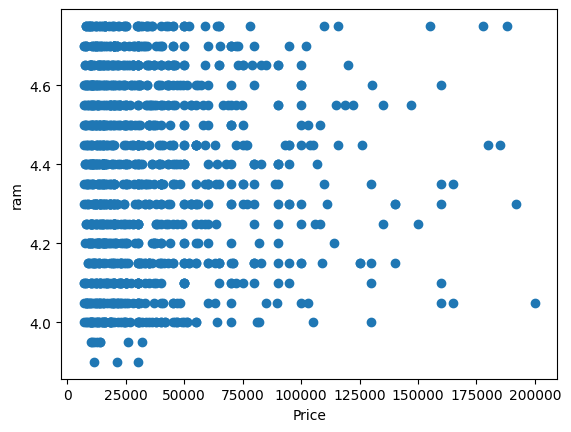

In [122]:
import matplotlib.pyplot as plt
plt.scatter(df6.Price,df6.Rating)
plt.xlabel('Price')
plt.ylabel("ram")
plt.show()

In [123]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train,y_train)
logR.score(X_test,y_test)

0.029914529914529916

In [124]:
from sklearn.ensemble import RandomForestRegressor
Rand = RandomForestRegressor()
Rand.fit(X_train,y_train)
Rand.score(X_test,y_test)

0.8182648285764524

In [125]:
import numpy as np

In [126]:
X

,Rating,Spec_score,Ram,Battery,Display,Inbuilt_memory,fast_charging,Processor,4G,5G,...,POCO,Poco,Realme,Samsung,TCL,Tecno,Vivo,Xiaomi,iQOO,itel
0,4.65,68,4.0,6000.0,6.6,128.0,25.0,8.0,False,True,...,False,False,False,True,False,False,False,False,False,False
4,4.10,69,4.0,5000.0,6.5,64.0,15.0,8.0,True,False,...,False,False,False,True,False,False,False,False,False,False
5,4.40,75,6.0,5000.0,6.5,128.0,15.0,8.0,False,True,...,False,False,False,True,False,False,False,False,False,False
6,4.10,76,4.0,6000.0,6.4,64.0,15.0,8.0,True,False,...,False,False,False,True,False,False,False,False,False,False
7,4.10,71,4.0,5000.0,6.5,64.0,15.0,8.0,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,4.05,75,4.0,5000.0,6.6,64.0,15.0,8.0,False,True,...,False,False,False,False,True,False,False,False,False,False
1366,4.10,80,8.0,5000.0,6.8,128.0,33.0,8.0,True,False,...,False,False,False,False,True,False,False,False,False,False
1367,4.00,80,6.0,5000.0,6.6,256.0,18.0,8.0,False,True,...,False,False,False,False,True,False,False,False,False,False
1368,4.50,79,6.0,5000.0,6.6,256.0,15.0,8.0,False,True,...,False,False,False,False,True,False,False,False,False,False


In [127]:
df6.columns

Index(['Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery', 'Display',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor'],
      dtype='object')

In [128]:
def predict_price(Rating, Spec_score, Ram, Battery, Display, Inbuilt_memory, fast_charging, Processor, No_of_sim, company):
    # Initialize the feature vector with zeros
    x = np.zeros(X.shape[1])
    
    # Set the values for the numerical columns
    x[0] = Rating
    x[1] = Spec_score
    x[2] = Ram
    x[3] = Battery
    x[4] = Display
    x[5] = Inbuilt_memory
    x[6] = fast_charging
    x[7] = Processor
    
    # Set the value for the categorical column 'No_of_sim'
    if No_of_sim in X.columns:
        sim_index = X.columns.get_loc(No_of_sim)
        x[sim_index] = 1
    
    # Set the value for the categorical column 'company'
    if company in X.columns:
        company_index = X.columns.get_loc(company)
        x[company_index] = 1
    
    # Make the prediction using the trained model 'Rand'
    return Rand.predict([x])[0]

In [129]:
predicted_price = predict_price(4.5, 86, 16, 6000, 6.5, 512, 30, 8, 'vo5G', 'Asus')
predicted_price

56639.48